# Data Understanding

Business Understanding/Project Objectives: <br>
What insights regarding land use and fertilizer usage can be gained, especially on its impact to yield?

Data is organized by county (South Dakota)

Source: NASS USDA Ag Census 2017
- Six fields on agricultural land use
- Provided yield values is average from 2017-2021

Nitrogen data (unknown source)
- Nitrogen loading rate for fertilizers
- Nitrogen loading rate for manure
- Estimated nitrogen demand rate, empirical model


# Data Preparation Summary

11 NA values, is data truly unavailable?
- Corn_acres data could be found from the 2017 NASS USDA Ag Census
- Others were more challenging to locate, dropped these rows from analysis (total 5 of 66 rows)
- Decided against using an imputer for missing values because of the lack of context of data set
- Elected  not to use an imputer because of small data size, one row was missing yield. Hard to understand without context why values are NA. Is it because they are 0? Would an average or nearest neighbor suffice? With time constraints, easier to drop than to do full scale investigation.

Create new features for nitrogen features based on their ratio to estimated nitrogen demand. 
- Fert_n_needs_ratio = fert_n_rate_lbs_acre / n_needs_lbs_acre
- Manure_n_needs_ratio = manure_n_rate_lbs_acre / n_needs_lbs_acre
- Newly created features were not used in modeling as it did not meaningfully deviate from the parent features.

# Data Loading

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [3]:
sdcorn_raw_df = pd.read_csv('SD_Corn.csv')
sdcorn_raw_df.head()

,state,county,fips,cropland_acres,corn_acres,conservation_tillage_excl_notill_acres,conservation_tillage_notill_acres,conventional_tillage_acres,cover_crop_acres,yield,fert_n_rate_lbs_acre,manure_n_rate_lbs_acre,n_needs_lbs_acre,geometry
0,South Dakota,Aurora,46003,228778,78500.00000,65423,99992,11552.0,5706.0,155.5,161.124276,51.390847,69.610341,"MULTIPOLYGON (((-98.80777 43.93522, -98.79758 ..."
1,South Dakota,Beadle,46005,548456,180750.00000,87470,328009,29519.0,5704.0,165.7,136.726941,14.375422,81.487331,"MULTIPOLYGON (((-98.70576 44.63416, -98.66585 ..."
2,South Dakota,Bennett,46007,214299,31100.00000,7795,72974,47351.0,465.0,103.2,89.123991,31.068594,124.817790,"MULTIPOLYGON (((-102.1108 43.3899, -102.0004 4..."
3,South Dakota,Bon Homme,46009,228354,83133.33333,70580,48560,67714.0,4071.0,165.9,131.508515,37.100255,76.031977,"MULTIPOLYGON (((-98.16134 42.85062, -98.16075 ..."
4,South Dakota,Brookings,46011,345429,148250.00000,116368,15684,127211.0,2581.0,194.8,207.033480,42.396388,93.723774,"MULTIPOLYGON (((-97.12908 44.26823, -97.12896 ..."


In [4]:
# Check column data types and how many are non-null vs null values
sdcorn_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   66 non-null     object 
 1   county                                  66 non-null     object 
 2   fips                                    66 non-null     int64  
 3   cropland_acres                          66 non-null     int64  
 4   corn_acres                              61 non-null     float64
 5   conservation_tillage_excl_notill_acres  66 non-null     int64  
 6   conservation_tillage_notill_acres       66 non-null     int64  
 7   conventional_tillage_acres              63 non-null     float64
 8   cover_crop_acres                        65 non-null     float64
 9   yield                                   65 non-null     float64
 10  fert_n_rate_lbs_acre                    66 non-null     float64


# Data Preparation

### Data Cleansing Addressing Null Values

There are certainly some missing data values in the data. Corn acres from 2017 could be easily found here: https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/South_Dakota/

Missing data for these counties will be incorporated into the data set. The remaining missing values were more challegning to trackdown. Rows containing these NA values will be dropped from further analysis. This only accounted for 5 of 66 rows, or 7.6% of total rows. 

In [5]:
sdcorn_df = pd.read_csv('Updated_SD_Corn.csv')
sdcorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   66 non-null     object 
 1   county                                  66 non-null     object 
 2   fips                                    66 non-null     int64  
 3   cropland_acres                          66 non-null     int64  
 4   corn_acres                              65 non-null     float64
 5   conservation_tillage_excl_notill_acres  66 non-null     int64  
 6   conservation_tillage_notill_acres       66 non-null     int64  
 7   conventional_tillage_acres              63 non-null     float64
 8   cover_crop_acres                        65 non-null     float64
 9   yield                                   65 non-null     float64
 10  fert_n_rate_lbs_acre                    66 non-null     float64


In [6]:
sdcorn_df.dropna(axis=0, inplace=True)    # drop rows that contain null values
sdcorn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   61 non-null     object 
 1   county                                  61 non-null     object 
 2   fips                                    61 non-null     int64  
 3   cropland_acres                          61 non-null     int64  
 4   corn_acres                              61 non-null     float64
 5   conservation_tillage_excl_notill_acres  61 non-null     int64  
 6   conservation_tillage_notill_acres       61 non-null     int64  
 7   conventional_tillage_acres              61 non-null     float64
 8   cover_crop_acres                        61 non-null     float64
 9   yield                                   61 non-null     float64
 10  fert_n_rate_lbs_acre                    61 non-null     float64


### Creating New Features

In [7]:
sdcorn_indexed_df = sdcorn_df.drop(columns=['state','county','geometry'])
sdcorn_indexed_df.set_index('fips')

,cropland_acres,corn_acres,conservation_tillage_excl_notill_acres,conservation_tillage_notill_acres,conventional_tillage_acres,cover_crop_acres,yield,fert_n_rate_lbs_acre,manure_n_rate_lbs_acre,n_needs_lbs_acre
fips,,,,,,,,,,
46003,228778,78500.00000,65423,99992,11552.0,5706.0,155.5,161.124276,51.390847,69.610341
46005,548456,180750.00000,87470,328009,29519.0,5704.0,165.7,136.726941,14.375422,81.487331
46007,214299,31100.00000,7795,72974,47351.0,465.0,103.2,89.123991,31.068594,124.817790
46009,228354,83133.33333,70580,48560,67714.0,4071.0,165.9,131.508515,37.100255,76.031977
46011,345429,148250.00000,116368,15684,127211.0,2581.0,194.8,207.033480,42.396388,93.723774
...,...,...,...,...,...,...,...,...,...,...
46125,350342,124433.33330,147774,29728,143153.0,13757.0,171.1,200.400697,40.096182,85.884319
46127,266743,113000.00000,127501,73265,45514.0,3381.0,183.4,225.096178,67.909659,109.652262
46129,273828,66400.00000,8629,200291,2793.0,8822.0,148.7,163.874035,22.129005,89.798876


In [8]:
sdcorn_indexed_df['fert_n_needs_ratio'] = sdcorn_indexed_df['fert_n_rate_lbs_acre'] / sdcorn_indexed_df['n_needs_lbs_acre']
sdcorn_indexed_df['manure_n_needs_ratio'] = sdcorn_indexed_df['manure_n_rate_lbs_acre'] / sdcorn_indexed_df['n_needs_lbs_acre']
# sdcorn_indexed_df['combined_n_needs_ratio'] = (sdcorn_indexed_df['manure_n_rate_lbs_acre'] + sdcorn_indexed_df['fert_n_rate_lbs_acre']) / sdcorn_indexed_df['n_needs_lbs_acre']

sdcorn_indexed_df = sdcorn_indexed_df[['yield','cropland_acres','corn_acres','conservation_tillage_excl_notill_acres','conservation_tillage_notill_acres','conventional_tillage_acres','cover_crop_acres','fert_n_rate_lbs_acre','fert_n_needs_ratio','manure_n_rate_lbs_acre','manure_n_needs_ratio','n_needs_lbs_acre']]

In [9]:
sdcorn_indexed_df.head()

,yield,cropland_acres,corn_acres,conservation_tillage_excl_notill_acres,conservation_tillage_notill_acres,conventional_tillage_acres,cover_crop_acres,fert_n_rate_lbs_acre,fert_n_needs_ratio,manure_n_rate_lbs_acre,manure_n_needs_ratio,n_needs_lbs_acre
0,155.5,228778,78500.00000,65423,99992,11552.0,5706.0,161.124276,2.314660,51.390847,0.738265,69.610341
1,165.7,548456,180750.00000,87470,328009,29519.0,5704.0,136.726941,1.677892,14.375422,0.176413,81.487331
2,103.2,214299,31100.00000,7795,72974,47351.0,465.0,89.123991,0.714033,31.068594,0.248912,124.817790
3,165.9,228354,83133.33333,70580,48560,67714.0,4071.0,131.508515,1.729647,37.100255,0.487956,76.031977
4,194.8,345429,148250.00000,116368,15684,127211.0,2581.0,207.033480,2.208975,42.396388,0.452355,93.723774


# Modeling/Analysis

### Correlation Study

In [10]:
# Summary statistics
sdcorn_indexed_df.describe()

,yield,cropland_acres,corn_acres,conservation_tillage_excl_notill_acres,conservation_tillage_notill_acres,conventional_tillage_acres,cover_crop_acres,fert_n_rate_lbs_acre,fert_n_needs_ratio,manure_n_rate_lbs_acre,manure_n_needs_ratio,n_needs_lbs_acre
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,146.280995,311461.918033,82223.841532,69439.655738,117110.000000,43255.098361,4532.704918,139.709766,1.679627,37.283495,0.452519,84.547604
std,33.557504,153860.161372,55544.497214,59770.723002,113703.097124,41858.002209,2969.287560,42.247046,0.471387,17.982085,0.224025,15.858845
min,60.800000,49435.000000,2188.000000,1766.000000,2019.000000,1265.000000,330.000000,50.660022,0.460343,14.375422,0.176413,43.038804
25%,130.900000,221206.000000,35000.000000,15485.000000,40398.000000,11537.000000,2567.000000,114.479758,1.486298,26.299731,0.297729,76.031977
50%,158.500000,266743.000000,82350.000000,60000.000000,73737.000000,27343.000000,3999.000000,143.725866,1.732332,33.214056,0.414039,84.636163
75%,170.400000,391197.000000,121400.000000,116368.000000,156871.000000,69054.000000,5740.000000,170.298549,2.029506,44.301959,0.536573,92.263429
max,194.800000,884554.000000,270666.666700,315910.000000,557295.000000,172951.000000,13757.000000,225.096178,2.424930,124.769179,1.378030,124.817790


- Strong Pearson correlation between features.
- Included manure to show manure nitrogen application rate has no impact on yield.

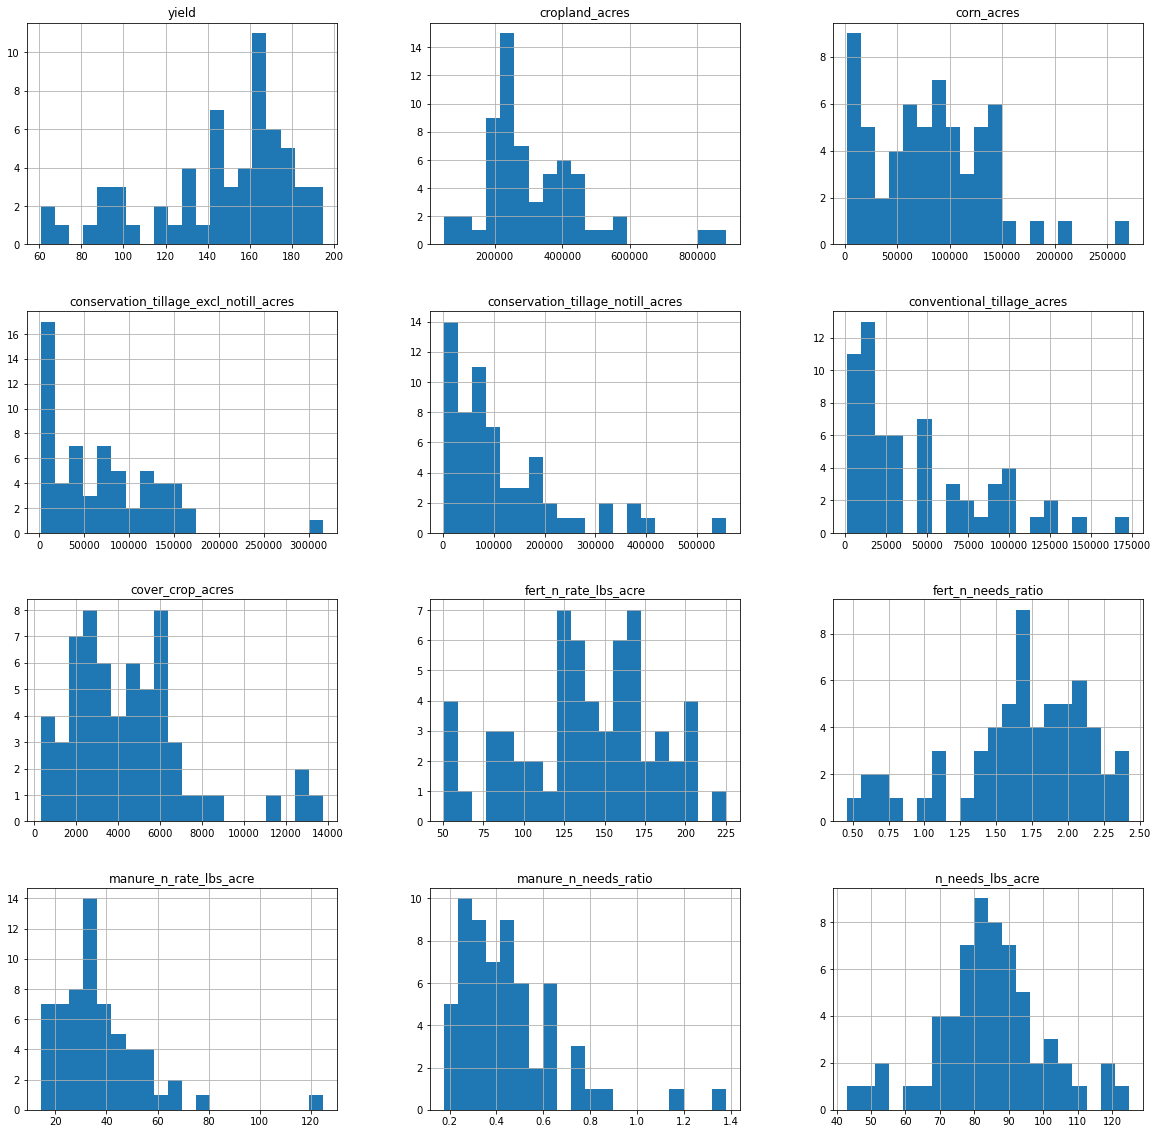

In [11]:
sdcorn_indexed_df.hist(bins=20, figsize=(20,20))
plt.show()

In [12]:
corr_matrix = sdcorn_indexed_df.corr()
corr_matrix

,yield,cropland_acres,corn_acres,conservation_tillage_excl_notill_acres,conservation_tillage_notill_acres,conventional_tillage_acres,cover_crop_acres,fert_n_rate_lbs_acre,fert_n_needs_ratio,manure_n_rate_lbs_acre,manure_n_needs_ratio,n_needs_lbs_acre
yield,1.000000,0.169757,0.614623,0.600117,-0.070217,0.595013,0.301954,0.758003,0.594736,0.000624,-0.117146,0.227499
cropland_acres,0.169757,1.000000,0.765930,0.628583,0.816080,0.148585,0.495780,0.363962,0.395943,-0.398439,-0.387261,-0.091864
corn_acres,0.614623,0.765930,1.000000,0.845755,0.498460,0.528763,0.479122,0.720712,0.663180,-0.232726,-0.302701,0.042007
conservation_tillage_excl_notill_acres,0.600117,0.628583,0.845755,1.000000,0.200337,0.575965,0.376215,0.681440,0.573755,-0.088892,-0.187791,0.135424
conservation_tillage_notill_acres,-0.070217,0.816080,0.498460,0.200337,1.000000,-0.297555,0.407144,0.117857,0.233833,-0.397055,-0.306461,-0.219378
conventional_tillage_acres,0.595013,0.148585,0.528763,0.575965,-0.297555,1.000000,0.222294,0.584248,0.473958,0.064139,-0.043191,0.165953
cover_crop_acres,0.301954,0.495780,0.479122,0.376215,0.407144,0.222294,1.000000,0.404458,0.427070,-0.295965,-0.307999,-0.065518
fert_n_rate_lbs_acre,0.758003,0.363962,0.720712,0.681440,0.117857,0.584248,0.404458,1.000000,0.855611,-0.126189,-0.275050,0.200433
fert_n_needs_ratio,0.594736,0.395943,0.663180,0.573755,0.233833,0.473958,0.427070,0.855611,1.000000,-0.235271,-0.146075,-0.312608
manure_n_rate_lbs_acre,0.000624,-0.398439,-0.232726,-0.088892,-0.397055,0.064139,-0.295965,-0.126189,-0.235271,1.000000,0.867825,0.170844


array([[<AxesSubplot:xlabel='yield', ylabel='yield'>,
        <AxesSubplot:xlabel='cropland_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='corn_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='conservation_tillage_excl_notill_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='conservation_tillage_notill_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='conventional_tillage_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='cover_crop_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='fert_n_rate_lbs_acre', ylabel='yield'>,
        <AxesSubplot:xlabel='fert_n_needs_ratio', ylabel='yield'>,
        <AxesSubplot:xlabel='manure_n_rate_lbs_acre', ylabel='yield'>,
        <AxesSubplot:xlabel='manure_n_needs_ratio', ylabel='yield'>,
        <AxesSubplot:xlabel='n_needs_lbs_acre', ylabel='yield'>],
       [<AxesSubplot:xlabel='yield', ylabel='cropland_acres'>,
        <AxesSubplot:xlabel='cropland_acres', ylabel='cropland_acres'>,
        <AxesSubplot:xlabel='corn_acre

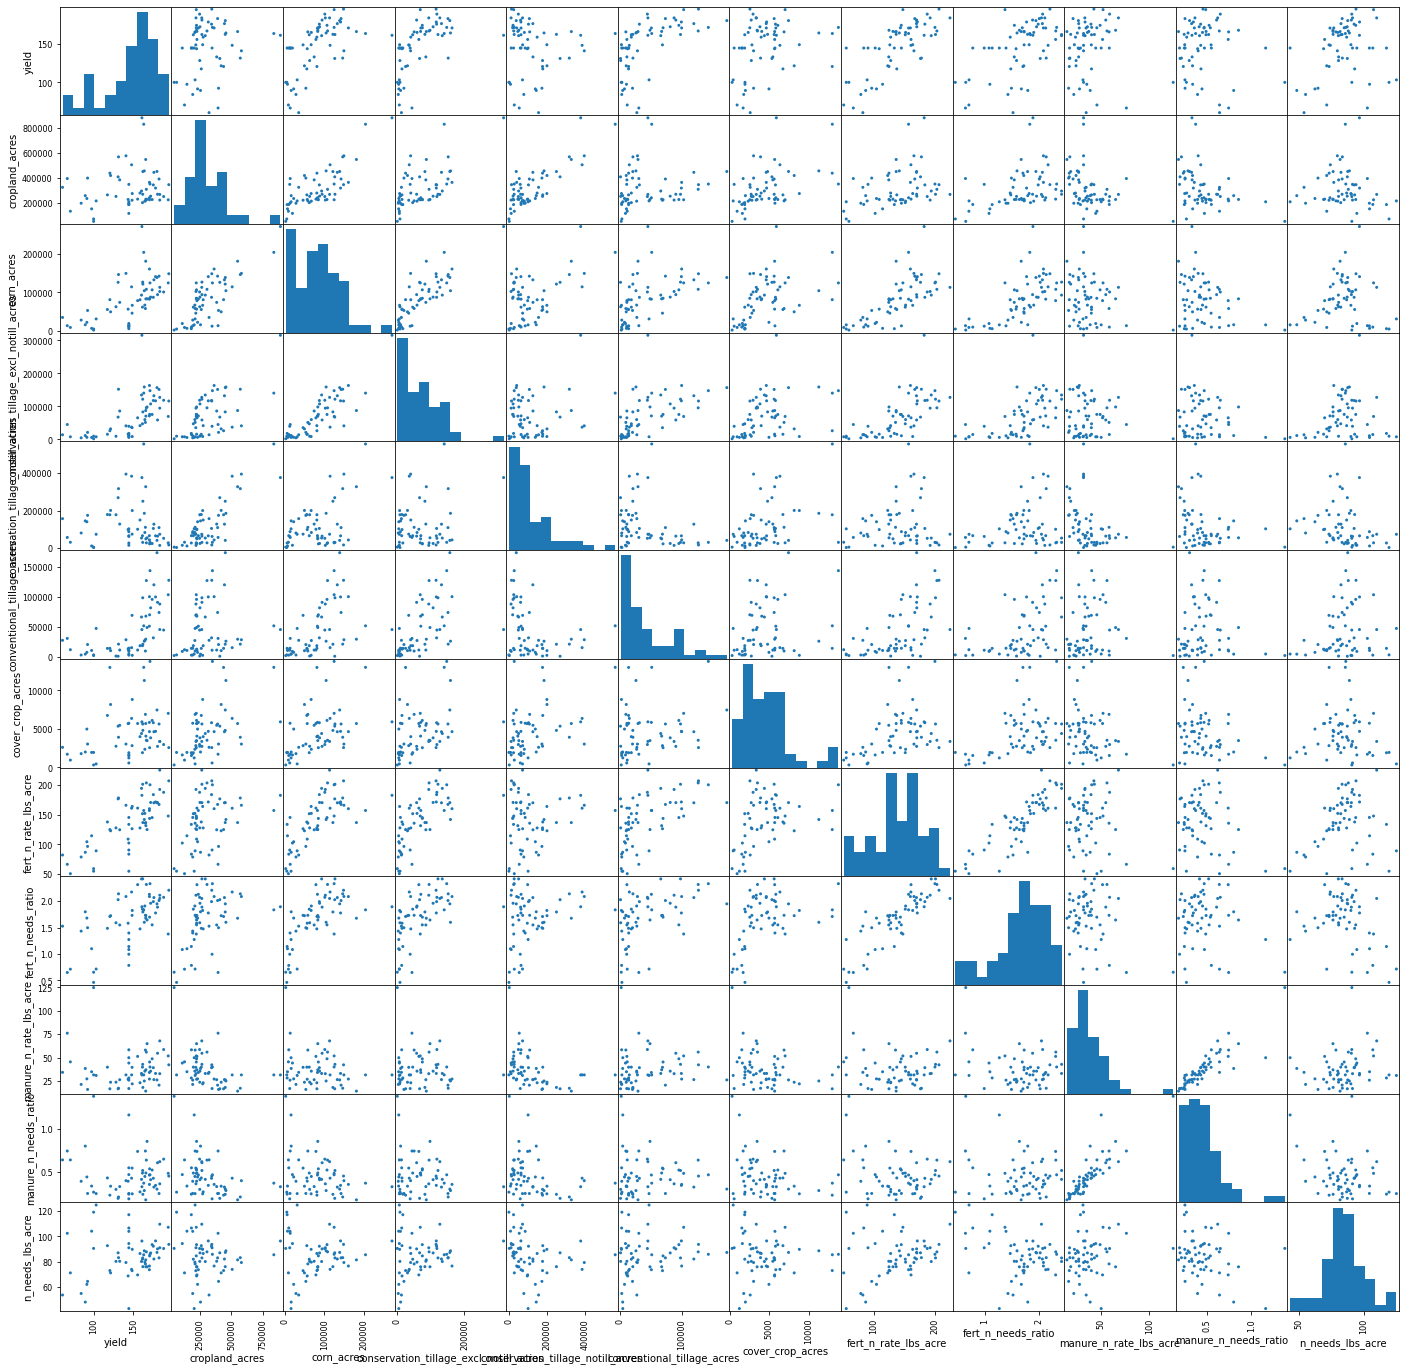

In [13]:
pd.plotting.scatter_matrix(sdcorn_indexed_df, alpha=1, figsize=(24,24))

In [14]:
# Create df focusing on parameters of interest
sdcorn_interest_indexed_df = sdcorn_indexed_df.drop(sdcorn_indexed_df.columns[[1,4,6,8,10,11]], axis=1)
corr_matrix = sdcorn_interest_indexed_df.corr()
corr_matrix

,yield,corn_acres,conservation_tillage_excl_notill_acres,conventional_tillage_acres,fert_n_rate_lbs_acre,manure_n_rate_lbs_acre
yield,1.000000,0.614623,0.600117,0.595013,0.758003,0.000624
corn_acres,0.614623,1.000000,0.845755,0.528763,0.720712,-0.232726
conservation_tillage_excl_notill_acres,0.600117,0.845755,1.000000,0.575965,0.681440,-0.088892
conventional_tillage_acres,0.595013,0.528763,0.575965,1.000000,0.584248,0.064139
fert_n_rate_lbs_acre,0.758003,0.720712,0.681440,0.584248,1.000000,-0.126189
manure_n_rate_lbs_acre,0.000624,-0.232726,-0.088892,0.064139,-0.126189,1.000000


array([[<AxesSubplot:xlabel='yield', ylabel='yield'>,
        <AxesSubplot:xlabel='corn_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='conservation_tillage_excl_notill_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='conventional_tillage_acres', ylabel='yield'>,
        <AxesSubplot:xlabel='fert_n_rate_lbs_acre', ylabel='yield'>,
        <AxesSubplot:xlabel='manure_n_rate_lbs_acre', ylabel='yield'>],
       [<AxesSubplot:xlabel='yield', ylabel='corn_acres'>,
        <AxesSubplot:xlabel='corn_acres', ylabel='corn_acres'>,
        <AxesSubplot:xlabel='conservation_tillage_excl_notill_acres', ylabel='corn_acres'>,
        <AxesSubplot:xlabel='conventional_tillage_acres', ylabel='corn_acres'>,
        <AxesSubplot:xlabel='fert_n_rate_lbs_acre', ylabel='corn_acres'>,
        <AxesSubplot:xlabel='manure_n_rate_lbs_acre', ylabel='corn_acres'>],
       [<AxesSubplot:xlabel='yield', ylabel='conservation_tillage_excl_notill_acres'>,
        <AxesSubplot:xlabel='corn_acres', ylabel='c

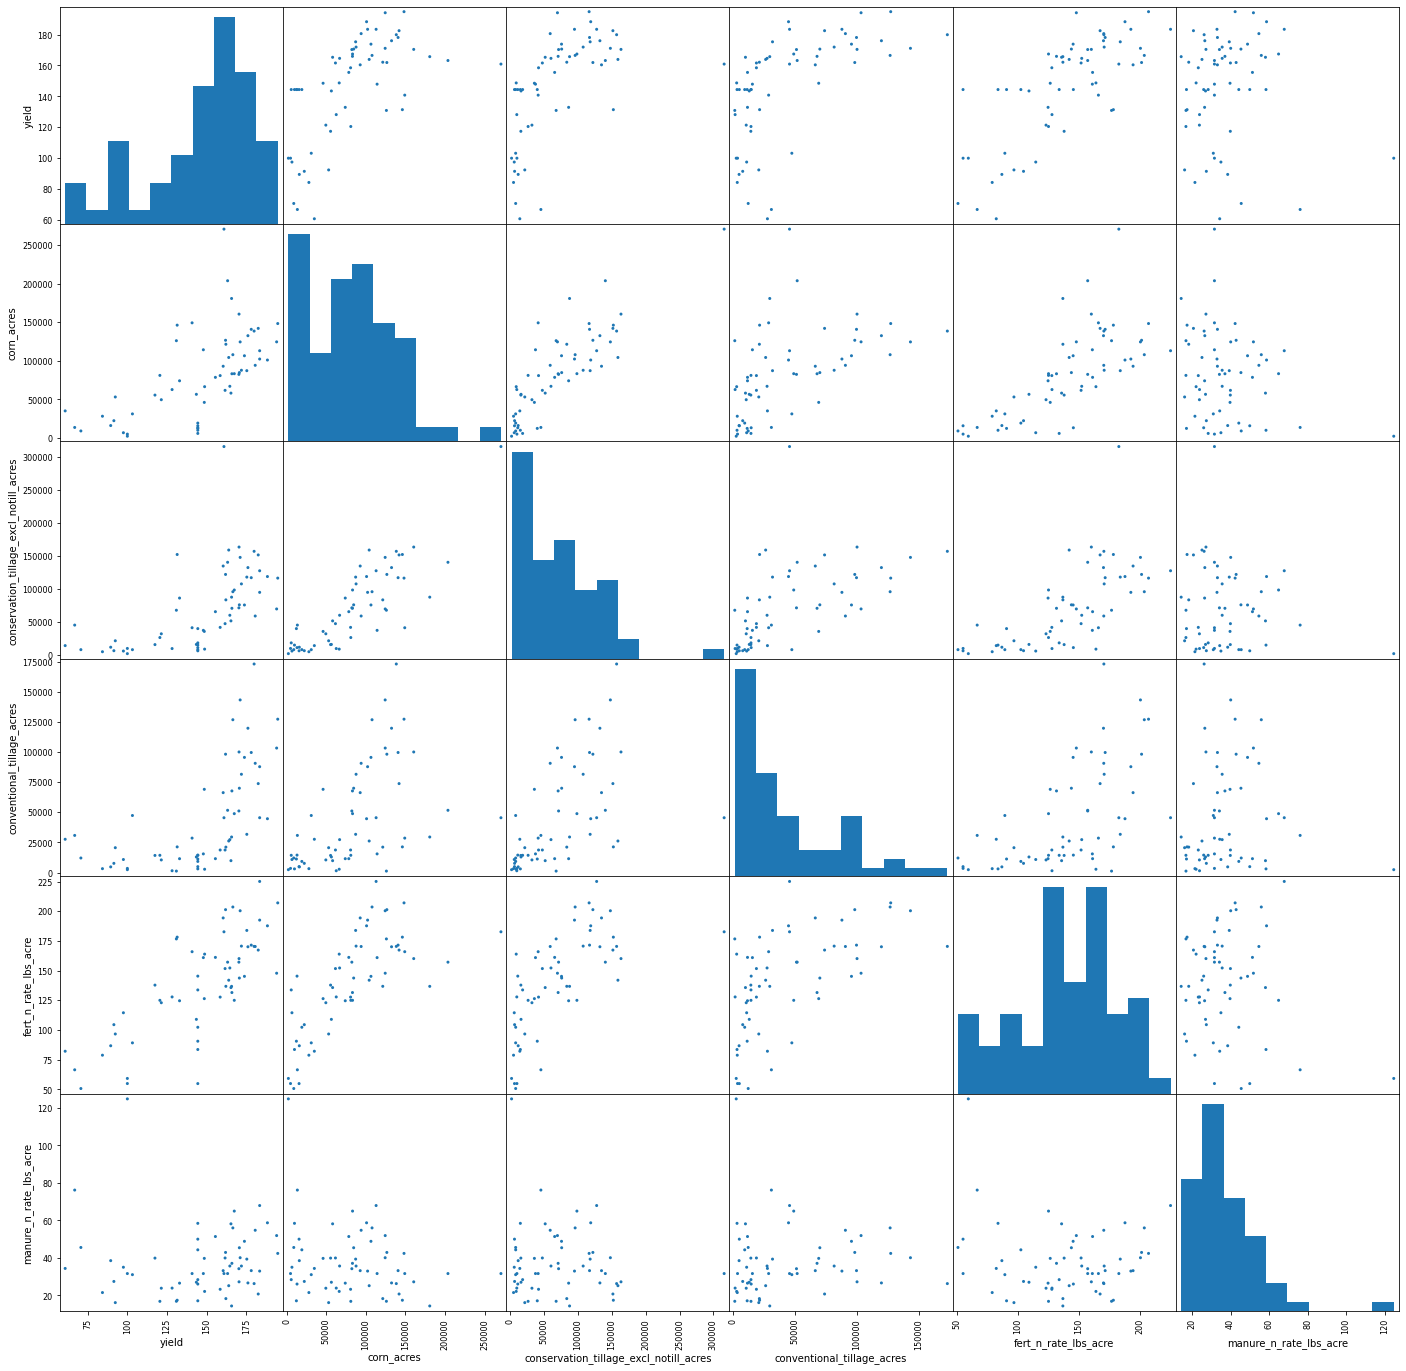

In [15]:
pd.plotting.scatter_matrix(sdcorn_interest_indexed_df, alpha=1, figsize=(24,24))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


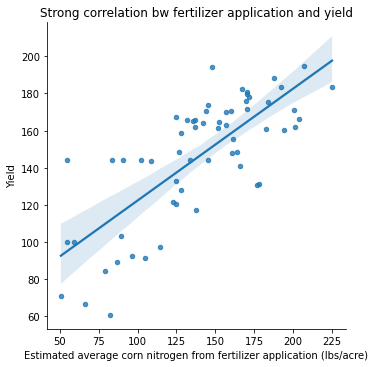

In [16]:
import seaborn as sns

sns.lmplot('fert_n_rate_lbs_acre','yield', data=sdcorn_interest_indexed_df, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

plt.title('Strong correlation bw fertilizer application and yield')
plt.xlabel('Estimated average corn nitrogen from fertilizer application (lbs/acre)')
plt.ylabel('Yield')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


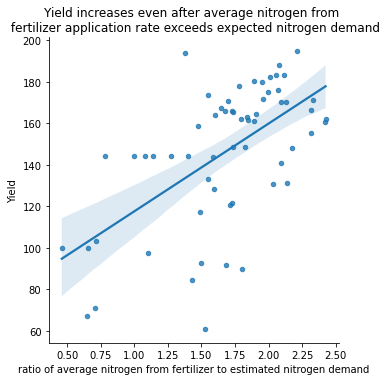

In [17]:
# fert_n_needs_ratio vs yield

sns.lmplot('fert_n_needs_ratio','yield', data=sdcorn_indexed_df, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

plt.title('Yield increases even after average nitrogen from \n fertilizer application rate exceeds expected nitrogen demand')
plt.xlabel('ratio of average nitrogen from fertilizer to estimated nitrogen demand')
plt.ylabel('Yield')
plt.show()

### Multiple Regression

From the correlation study above, a selected number of parameters might be good candidates for multiple regression analysis. Since we're just looking at exploring insights from the data, we won't separate the data into training and testing. There isn't enough data to meaningfully test the data anyway. 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = sdcorn_interest_indexed_df[['corn_acres','conservation_tillage_excl_notill_acres','conventional_tillage_acres','fert_n_rate_lbs_acre']]
y = sdcorn_interest_indexed_df[['yield']]

In [20]:
reg=LinearRegression()     # initiating linear regression
reg.fit(X,y)
reg.score(X,y)

0.614345136359537

In [21]:
reg.coef_

array([[3.70642023e-05, 2.59412142e-05, 1.67151250e-04, 4.45205248e-01]])

In [22]:
reg.intercept_

array([72.00241974])

In [23]:
import statsmodels.api as sm

In [24]:
X = sm.add_constant(X)
model= sm.OLS(y,X).fit() 
predictions= model.summary()
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     22.30
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           4.72e-11
Time:                        13:31:19   Log-Likelihood:                -271.30
No. Observations:                  61   AIC:                             552.6
Df Residuals:                      56   BIC:                             563.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     72.0024     10.703      6.728      0.000      50.563      93.442
corn_acres                              3.706e-05      0.000      0.366      0.715      -0.000       0.000
conservation_tillage_excl_notill_acres  2.594e-05   9.16e-05      0.283      0.778      -0.000       0.000
conventional_tillage_acres                 0.0002   8.59e-05      1.945      0.057   -5.02e-06       0.000
fert_n_rate_lbs_acre                       0.4452      0.102      4.369      0.000       0.241       0.649
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.232
Skew:                          -0.263   Prob(JB):                        0.540
Kurtosis:                       2.544   Cond. No.                     5.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Likely some relationship between land use and yields and confounded factors at play, needs further investigation.
- Fertilizer application rate again shows greatest correlation.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


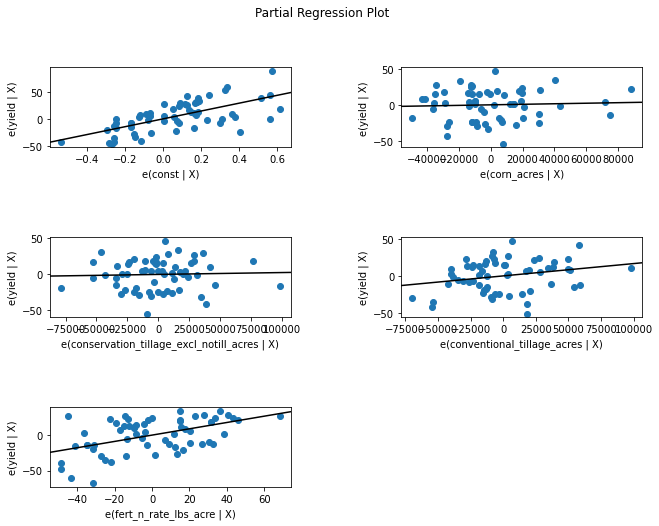

In [25]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1)
fig.set_size_inches(10,8)

### Polynomial Regression Model

In [26]:
X_poly = sdcorn_indexed_df[['cropland_acres','corn_acres','conservation_tillage_excl_notill_acres','conservation_tillage_notill_acres','conventional_tillage_acres','cover_crop_acres','fert_n_rate_lbs_acre','fert_n_needs_ratio']]
y_poly = sdcorn_indexed_df[['yield']]

In [27]:
model = sm.OLS(y_poly, X_poly).fit()
ypred = model.predict(X_poly) 

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  yield   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              212.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                    1.88e-37
Time:                        13:31:20   Log-Likelihood:                         -285.48
No. Observations:                  61   AIC:                                      587.0
Df Residuals:                      53   BIC:                                      603.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
cropland_acres                             0.0002    6.7e-05      2.436      0.018    2.88e-05       0.000
corn_acres                                 0.0002      0.000      0.981      0.331      -0.000       0.001
conservation_tillage_excl_notill_acres    -0.0003      0.000     -1.899      0.063      -0.001    1.74e-05
conservation_tillage_notill_acres         -0.0003      0.000     -2.279      0.027      -0.000   -3.19e-05
conventional_tillage_acres                -0.0002      0.000     -1.037      0.304      -0.001       0.000
cover_crop_acres                           0.0006      0.001      0.431      0.668      -0.002       0.004
fert_n_rate_lbs_acre                       0.8047      0.188      4.278      0.000       0.427       1.182
fert_n_needs_ratio                        11.5995     14.961      0.775      0.442     -18.408      41.607
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                1.045
Skew:                           0.291   Prob(JB):                        0.593
Kurtosis:                       2.731   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree

In [30]:
tree_reg = DecisionTreeRegressor(max_depth=3)
fig = tree_reg.fit(X_poly, y_poly)

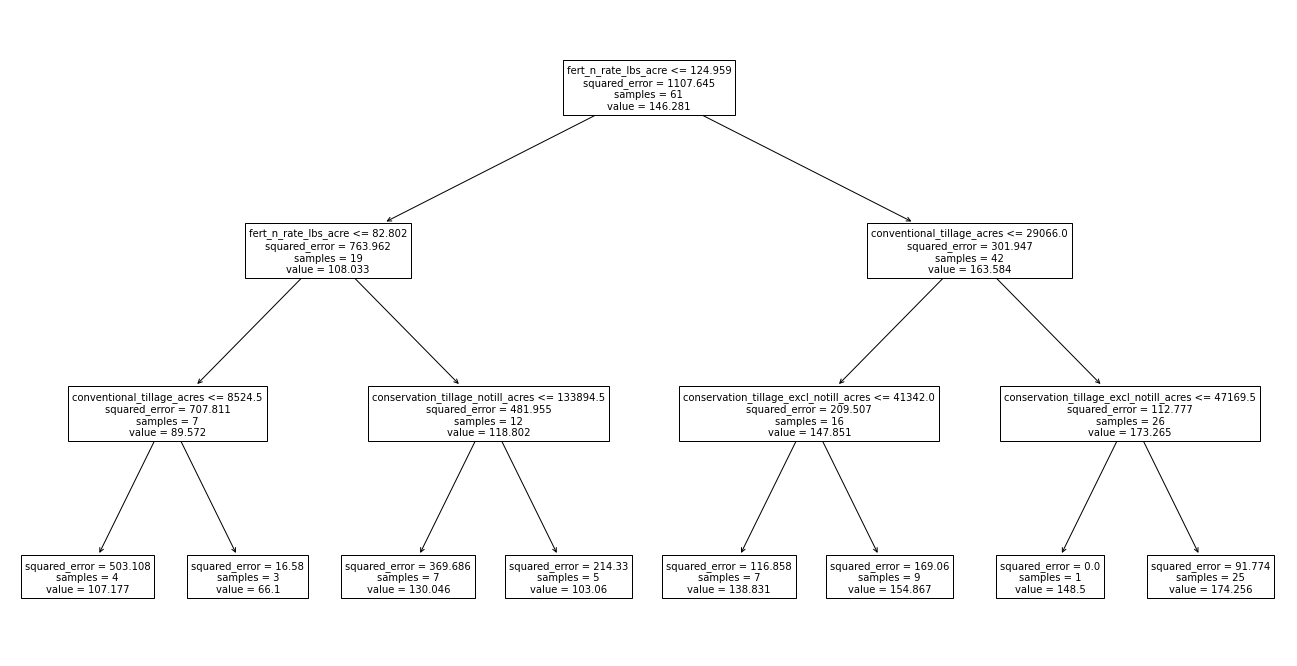

In [31]:
plt.figure(figsize=(23,12))
tree.plot_tree(fig, feature_names=X_poly.columns, fontsize=10)
plt.show()

Let's see if parsimony can be gained by reducing the depth of the regression tree.

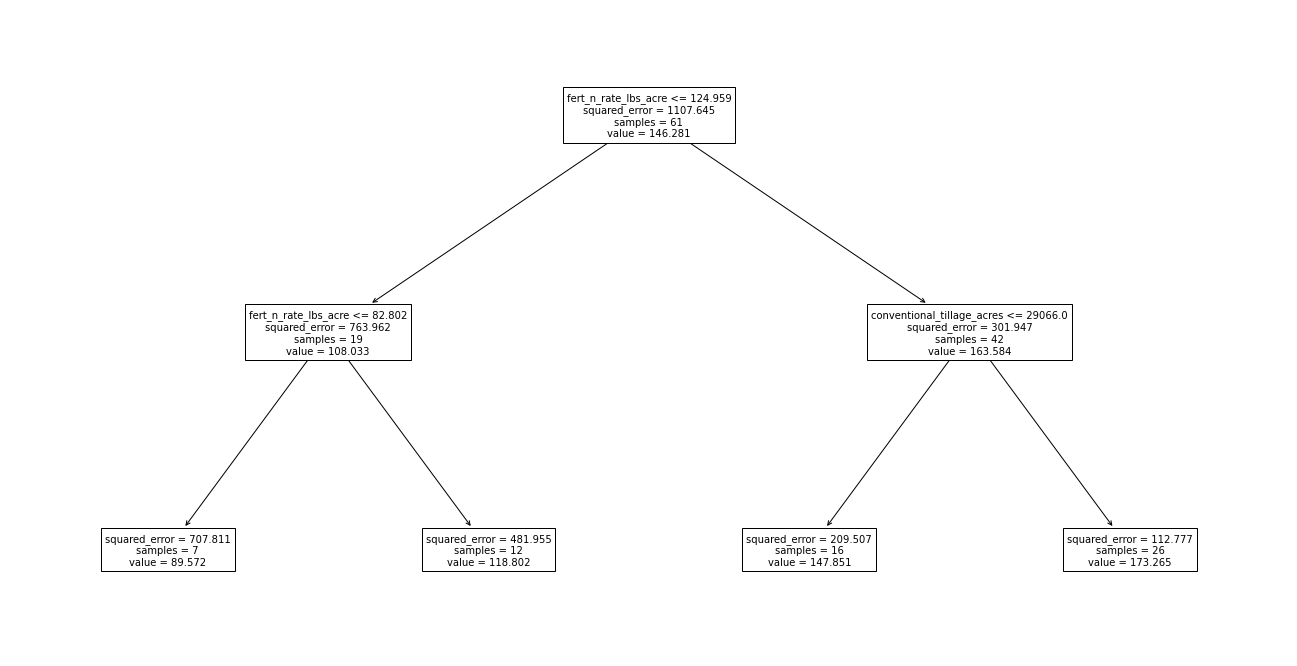

In [34]:
tree_reg = DecisionTreeRegressor(max_depth=2)
fig = tree_reg.fit(X_poly, y_poly)

plt.figure(figsize=(23,12))
tree.plot_tree(fig, feature_names=X_poly.columns, fontsize=10)
plt.show()

# Insights

1. Nitrogen application via fertilizer was by far the strongest feature in determining yield. Yield linearly increased with more fertilizer, even after exceeding estimated corn nitrogen demand.
2. Nitrogen application via manure had no correlation at all in determining yield. While further investigation is warranted, the data suggests that manure should not be used as a nitrogen source for corn. Its usage reduction may have significant benefits in preventing nitrogen runoff, without impacting yield.
3. Land use had significant impact on yield as well. A couple of these features had very high correlation with fertilizer application rates (larger agricultural counties appear to use more fertilizer). There may also be advantages in leveraging economies of scale in larger corn growing counties or other confounded factors at play. Overall, conventional tillage acres had a strong positive correlation to yield.  


With more time:
- Data is aggregated at a high-level (county-level). It would be helpful to be able to drill down to the farm level. 
- It would be helpful to see variation of measurements and rates within a county, to understand the spread of the data and whether values at county level are representative aggregations. 
- We likely need to see the year-to-year variability and perform some kind of time series analysis. The values for yield was the average from 2017-2021. There has been extremely large variability in yield in the last several years.
- Further analysis of conservation tillage impacts on yield and land use in general. It would be helpful to index these acreage values so that we can compare yield rate to land use rates. 
- Features like cover crop acres and no tillage acres did not appear to have negative impacts to yield. It would be valuable to further study how these impact runoff and nutrient loading. 
- Perhaps a principal component analysis with some of the features could draw insights as well. Especially around land use.